In [2]:
%matplotlib inline
import networkx as nx
import nwtools.communities
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
filepath = '/media/sf_VBox_Shared/CaseLaw/2018-01-29-lido/derived/'
leg_nodes = pd.read_csv(os.path.join(filepath, 'article_title_nodes_min5.csv'))
leg_edges = pd.read_csv(os.path.join(filepath, 'article_to_article_title_min5.csv'))

In [5]:
leg_edges.head()

,id,source,target,weight
0,253,"Aanbestedingswet 2012, Artikel 1.1","Aanbestedingswet 2012, Artikel 1.5",5
1,360,"Aanbestedingswet 2012, Artikel 1.8","Aanbestedingswet 2012, Artikel 1.9",17
2,423,"Aanbestedingswet 2012, Artikel 1.4","Aanbestedingswet 2012, Artikel 2.114",5
3,518,"Aanbestedingswet 2012, Artikel 2.127","Aanbestedingswet 2012, Artikel 2.130",5
4,552,"Aanbestedingswet 2012, Artikel 2.127","Aanbestedingswet 2012, Artikel 2.131",5


In [6]:
leg_nodes.head()

,id,label,title,book,community,cc
0,"Ziektewet, Artikel 4","Ziektewet, Artikel 4","Ziektewet, Artikel 4",Ziektewet,0,0
1,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,Wetboek van Burgerlijke Rechtsvordering (geldt...,2,0
2,"Verstrekkingenbesluit ziekenfondsverzekering, ...","Verstrekkingenbesluit ziekenfondsverzekering, ...","Verstrekkingenbesluit ziekenfondsverzekering, ...",Verstrekkingenbesluit ziekenfondsverzekering,0,0
3,"Faillissementswet, Artikel 131","Faillissementswet, Artikel 131","Faillissementswet, Artikel 131",Faillissementswet,2,0
4,Bouwstoffenbesluit bodem- en oppervlaktewatere...,Bouwstoffenbesluit bodem- en oppervlaktewatere...,Bouwstoffenbesluit bodem- en oppervlaktewatere...,Bouwstoffenbesluit bodem- en oppervlaktewatere...,4,0


In [7]:
graph = nx.from_pandas_edgelist(leg_edges, source='source', target='target', edge_attr='weight')
partition = leg_nodes.set_index('id')['community'].to_dict()

In [9]:
com_statistics = nwtools.communities.partition_statistics(partition, graph, weight='weight')

com_statistics_df = pd.DataFrame.from_dict(com_statistics, orient='index')

In [10]:
com_statistics_df.index.name = 'community'

In [11]:
com_statistics_df.sort_values('size', ascending=False).head(10)

,average_degree,total_degree,conductance,weighted_conductance,average_strength,total_strength,external_strength,external_degree,average_internal_degree,average_internal_strength,size,average_external_strength,average_external_degree,internal_strength,internal_degree
community,,,,,,,,,,,,,,,
1,26.986381,107001,0.577761,0.550891,609.933417,2418386,1332268,61821,11.394704,273.926356,3965,336.007062,15.591677,1086118,45180
2,18.107203,43240,0.563599,0.547599,265.772613,634665,347542,24370,7.902010,120.235762,2388,145.536851,10.205193,287123,18870
3,22.779627,34215,0.738623,0.669813,586.622503,881107,590177,25272,5.954061,193.695073,1502,392.927430,16.825566,290930,8943
6,56.900842,60827,0.614809,0.539163,3315.027128,3543764,1910666,37397,21.917680,1527.687558,1069,1787.339570,34.983162,1633098,23430
5,17.411137,14695,0.704866,0.660044,307.246445,259316,171160,10358,5.138626,104.450237,844,202.796209,12.272512,88156,4337
16,12.418773,3440,0.638081,0.612862,142.693141,39526,24224,2195,4.494585,55.241877,277,87.451264,7.924188,15302,1245
18,15.380282,2184,0.618590,0.601740,173.183099,24592,14798,1351,5.866197,68.971831,142,104.211268,9.514085,9794,833
17,10.812950,1503,0.630073,0.592975,161.798561,22490,13336,947,4.000000,65.856115,139,95.942446,6.812950,9154,556
22,11.656566,1154,0.720104,0.666402,203.323232,20129,13414,831,3.262626,67.828283,99,135.494949,8.393939,6715,323


In [19]:
com_statistics_df.sort_values('weighted_conductance', ascending=False).head(10)

,internal_degree,total_strength,average_internal_strength,total_degree,external_strength,conductance,external_degree,average_internal_degree,average_external_degree,internal_strength,average_degree,average_strength,weighted_conductance,average_external_strength,size
community,,,,,,,,,,,,,,,
127,1,50,6.000000,6,38,0.833333,5,0.500000,2.500000,12,3.000000,25.000000,0.760000,19.000000,2
131,21,818,25.250000,93,616,0.774194,72,2.625000,9.000000,202,11.625000,102.250000,0.753056,77.000000,8
60,70,8658,95.826087,340,6454,0.794118,270,3.043478,11.739130,2204,14.782609,376.434783,0.745438,280.608696,23
8,500,189896,646.235294,3162,134966,0.841872,2662,5.882353,31.317647,54930,37.200000,2234.070588,0.710736,1587.835294,85
183,10,243,9.125000,37,170,0.729730,27,1.250000,3.375000,73,4.625000,30.375000,0.699588,21.250000,8
43,62,2182,35.650000,195,1469,0.682051,133,3.100000,6.650000,713,9.750000,109.100000,0.673236,73.450000,20
3,8943,881107,193.695073,34215,590177,0.738623,25272,5.954061,16.825566,290930,22.779627,586.622503,0.669813,392.927430,1502
0,166,7014,35.769231,542,4689,0.693727,376,2.553846,5.784615,2325,8.338462,107.907692,0.668520,72.138462,65
4,2,30,3.333333,6,20,0.666667,4,0.666667,1.333333,10,2.000000,10.000000,0.666667,6.666667,3


In [20]:
com_statistics_df.to_csv(os.path.join(filepath, 'legislation_titles_community_report.csv'))

In [24]:
largest_coms = leg_nodes.community.value_counts().index[:20]
largest_books = leg_nodes.book.value_counts().index[:20]

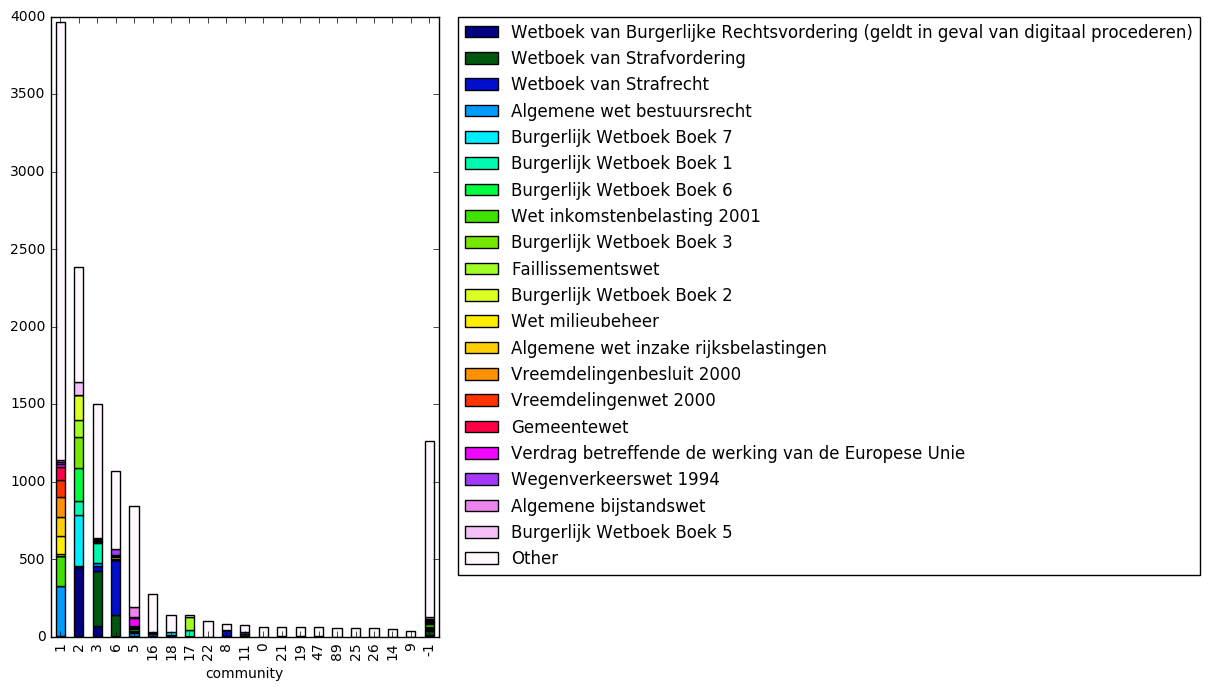

In [29]:
df_plot = leg_nodes.copy()

other_com = -1
other_book = 'Other'

df_plot.loc[~df_plot.community.isin(largest_coms), 'community'] = other_com
df_plot.loc[~df_plot.book.isin(largest_books), 'book'] = other_book

df_plot = df_plot.groupby(['community', 'book']).count()['id'].unstack()

#leg_nodes[leg_nodes.community.isin(largest_coms) & leg_nodes.book.isin(largest_books)]

df_plot = df_plot.loc[list(largest_coms)+[other_com], list(largest_books)+[other_book]]
df_plot.plot.bar(stacked=True, colormap='gist_ncar', figsize=(5, 8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [31]:
leg_nodes.community.value_counts().head(30)

1      3965
2      2388
3      1502
6      1069
5       844
16      277
18      142
17      139
22       99
8        85
11       75
0        65
21       64
19       61
47       60
89       57
25       55
26       54
14       53
9        40
30       39
28       36
53       35
40       31
52       28
31       25
23       24
36       24
60       23
104      22
Name: community, dtype: int64